In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

In [ ]:
print("\n model evaluation :")
print('accuracy:', accuracy_score(y_test, y_pred))
print("\nclassification report:\n", classification_report(y_test, y_pred))


 model evaluation :
accuracy: 0.7077922077922078

classification report:
               precision    recall  f1-score   support

           0       0.75      0.83      0.78        99
           1       0.61      0.49      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



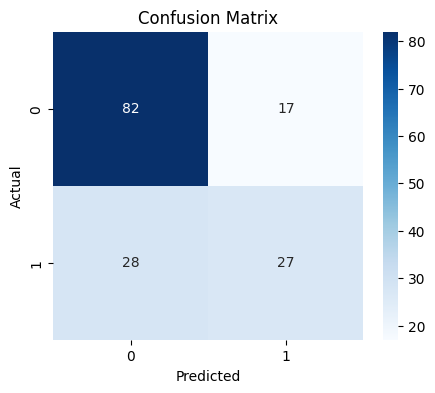

In [24]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy for k=1: 0.6753246753246753


ValueError: x and y must have same first dimension, but have shapes (49,) and (1,)

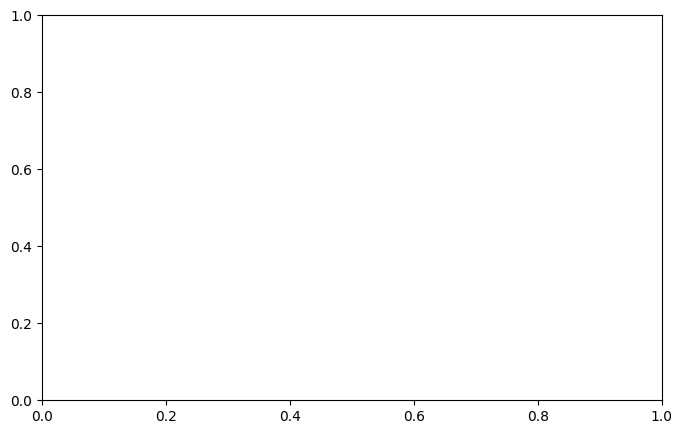

In [29]:
error_rate = []
for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred_k = knn.predict(x_test)
    acc = accuracy_score(y_test, pred_k)
    print(f'Accuracy for k={k}: {acc}')
    error_rate.append(np.mean(pred_k != y_test))
    
    plt.figure(figsize=(8,5))
    plt.plot(range(1, 50), error_rate, linestyle='dashed', marker='o',)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()

In [32]:
sample=np.array([[0,180,70,70,80,30,0.4,40]])
prediction=knn.predict(sample)[0]
if prediction==0:
    print("\n The person is not diabetic")
else:
    print("\n The person is diabetic")


 The person is not diabetic


c:\Users\User\Desktop\machine_Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
